In [ ]:
!pip install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.94 s


In [ ]:
# Imbalanced Class Distribution dengan metode random undersampling (Majority)
# meng-import library yang diperlukan
from collections import Counter
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot
from numpy import where

time: 8.76 ms


In [ ]:
# mendefinisikan dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# menampilkan distribusi class
counter = Counter(y)
print(counter)

Counter({0: 990, 1: 10})
time: 7.41 ms


In [ ]:
# mendeklarasikan metode undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
# menanamkan metode undersampling ke dalam dataset
X_over, y_over = undersample.fit_resample(X, y)

time: 5.41 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# menampilkan distribusi class yang baru
counter = Counter(y_over)
print(counter)

Counter({0: 10, 1: 10})
time: 2.42 ms


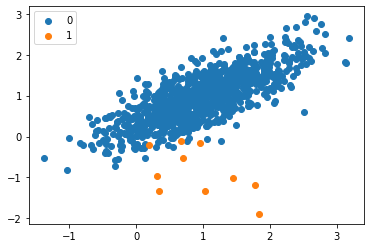

time: 237 ms


In [ ]:
# menampilkan persebaran class menggunakan pyplot berdasarkan label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
# mendefinisikan pipeline 
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

time: 2.41 ms


In [ ]:
# melakukan penilaian  untuk menampilkan tingkat akurasi
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.939
time: 152 ms
